In [20]:
'''
File name: preprocessing.ipynb
Authors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt
Date created: 04/11/2022
Date last modified: 06/11/2022
Python version: 3.8.8
'''

'\nFile name: preprocessing.ipynb\nAuthors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt\nDate created: 04/11/2022\nDate last modified: 06/11/2022\nPython version: 3.8.8\n'

In [3]:
#Imports used in this notebook
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_folder = 'data/'

In [5]:
print("Reading in movie data")

# Read in movie metadata and plot summaries
movie_headers = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name','Movie release date','Movie box office revenue',
                 'Movie runtime','Movie languages','Movie countries','Movie genres']
plot_headers = ['Wikipedia movie ID','Plot Summary']
character_headers = ['Wikipedia movie ID', 'Freebase movie ID','Movie release date','Character name','Actor date of birth',
                     'Actor gender','Actor height','Actor ethnicity','Actor name','Actor age at movie release',
                     'Freebase character/actor map ID','Freebase character ID','Freebase actor ID']

movie_metadata = pd.read_csv(data_folder + 'movie.metadata.tsv',sep='\t',header=None,names=movie_headers,index_col=0)
plot_summaries = pd.read_csv(data_folder + 'plot_summaries.txt',sep='\t',index_col=0,names=plot_headers)
character_metadata = pd.read_csv(data_folder + 'character.metadata.tsv',sep='\t',header=None,names=character_headers,index_col='Wikipedia movie ID')

Reading in movie data


In [6]:
movie_metadata_clean.head()

NameError: name 'movie_metadata_clean' is not defined

In [52]:
plot_summaries.head()

,Plot Summary
Wikipedia movie ID,
23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
31186339,The nation of Panem consists of a wealthy Capi...
20663735,Poovalli Induchoodan is sentenced for six yea...
2231378,"The Lemon Drop Kid , a New York City swindler,..."
595909,Seventh-day Adventist Church pastor Michael Ch...


In [8]:
print("Movies with biggest box office revenues:")
movie_metadata.sort_values('Movie box office revenue', ascending = False).head()

Movies with biggest box office revenues:


,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,
4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
52371,/m/0dr_4,Titanic,1997-11-01,2.185372e+09,194.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/09c7w0"": ""United States of America""}","{""/m/0fx2s"": ""Tragedy"", ""/m/04xvh5"": ""Costume ..."
22114132,/m/062zm5h,The Avengers,2012-04-11,1.511758e+09,137.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ..."
31941988,/m/0gvsynb,Harry Potter and the Deathly Hallows – Part 2,2011-07-07,1.328111e+09,130.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/07s9rl0"": ""Drama"", ""/m/02n4kr"": ""Mystery""..."
25001260,/m/0872p_c,Transformers: Dark of the Moon,2011-06-23,1.123747e+09,157.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie..."


In [9]:
print("What is needed to be processed:")
print("Rows with actor age at movie release under or equal to 0: %d" %len(character_metadata[character_metadata['Actor age at movie release']<=0]))
print("Rows with actor height under or equal to 0: %d" %len(character_metadata[character_metadata['Actor height']<=0]))
print("Rows with movie runtime under or equal to 0: %d" %len(movie_metadata[movie_metadata['Movie runtime']<=0]))

What is needed to be processed:
Rows with actor age at movie release under or equal to 0: 433
Rows with actor height under or equal to 0: 0
Rows with movie runtime under or equal to 0: 1


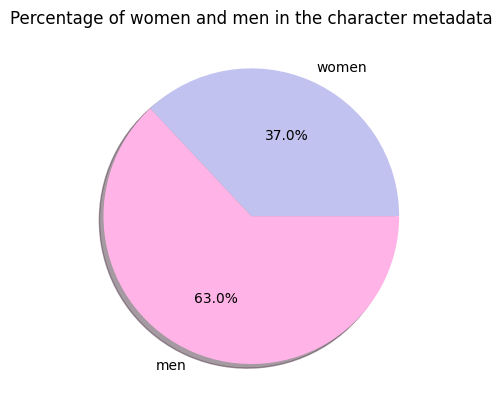

In [10]:
fem_act = character_metadata[character_metadata['Actor gender'] == 'F']
masc_act = character_metadata[character_metadata['Actor gender'] == 'M']
plt.pie(np.array([fem_act['Actor name'].nunique(),masc_act['Actor name'].nunique()]),labels=['women','men'],colors = ['#c2c2f0','#ffb3e6'],autopct='%1.1f%%',shadow=True)
plt.title('Percentage of women and men in the character metadata')
plt.show()

In [11]:
#replace NaN values with 0
character_metadata_clean = character_metadata.fillna(0)
movie_metadata_clean = movie_metadata.fillna(0)

In [12]:

#new dataframe with movies after 2007 after converting the release date to datetime some dates are only year so we need to add the month and day

movie_metadata_clean['Movie release date'] = pd.to_datetime(movie_metadata_clean['Movie release date'],errors='coerce')
movie_metadata_clean = movie_metadata_clean[movie_metadata_clean['Movie release date'] > datetime(2007,1,1)]
movie_metadata_clean.head()

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,
21926710,/m/05p45cv,White on Rice,2009-01-01,0.0,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""..."
20604092,/m/0523t_1,Anbu Thozhi,2007-08-17,0.0,0.0,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film""}"
29772142,/m/0fq260_,Karayilekku Oru Kadal Dooram,2010-12-31,0.0,110.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}"
26623942,/m/0bh9fbk,Kausthubham,2010-03-19,0.0,0.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}"
32445576,/m/0gyv1h1,Vinayaka Geleyara Balaga,2011-07-15,0.0,0.0,{},{},{}


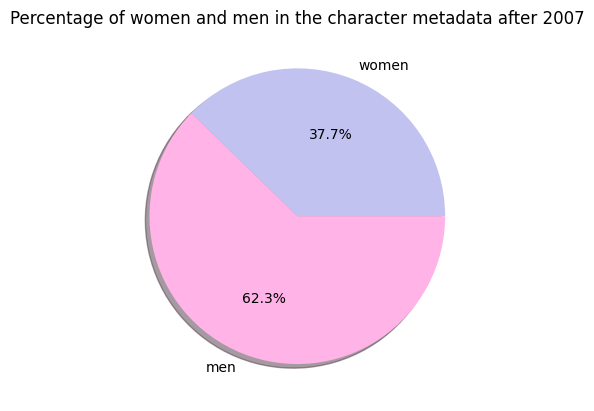

In [13]:
#only keep characters with 'wikipedia movie ID' in movie_metadata_clean after 2007
character_metadata_clean = character_metadata_clean[character_metadata_clean.index.isin(movie_metadata_clean.index)]
#number of female actors compared to male actors for movies after 2007 plotted in a pie chart
fem_act = character_metadata_clean[character_metadata_clean['Actor gender'] == 'F']
masc_act = character_metadata_clean[character_metadata_clean['Actor gender'] == 'M']
plt.pie(np.array([fem_act['Actor name'].nunique(),masc_act['Actor name'].nunique()]),labels=['women','men'],colors = ['#c2c2f0','#ffb3e6'],autopct='%1.1f%%',shadow=True)
plt.title('Percentage of women and men in the character metadata after 2007')
plt.show()




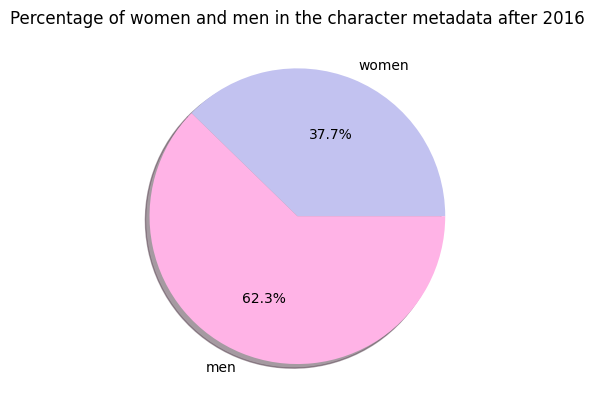

In [14]:
#new dataframe with movies after 2016 
x = movie_metadata_clean[movie_metadata_clean['Movie release date'] > datetime(2016,1,1)]
#only keep characters with 'wikipedia movie ID' in movie_metadata_clean after 2016
character_metadata_clean = character_metadata_clean[character_metadata_clean.index.isin(movie_metadata_clean.index)]
#number of female actors compared to male actors for movies after 2016 plotted in a pie chart
fem_act = character_metadata_clean[character_metadata_clean['Actor gender'] == 'F']
masc_act = character_metadata_clean[character_metadata_clean['Actor gender'] == 'M']
plt.pie(np.array([fem_act['Actor name'].nunique(),masc_act['Actor name'].nunique()]),labels=['women','men'],colors = ['#c2c2f0','#ffb3e6'],autopct='%1.1f%%',shadow=True)
plt.title('Percentage of women and men in the character metadata after 2016')
plt.show()




In [44]:
character_metadata.head()

,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
Wikipedia movie ID,,,,,,,,,,,,
975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [43]:
#in movie_metadata only keep movie_metadata['wikipedia movie ID'] that exist in character_metadata['wikipedia movie ID' and plot_summaries['wikipedia movie ID'

plot_summaries['wikipedia movie ID'].isin(character_metadata['wikipedia movie ID']).value_counts()


KeyError: 'wikipedia movie ID'

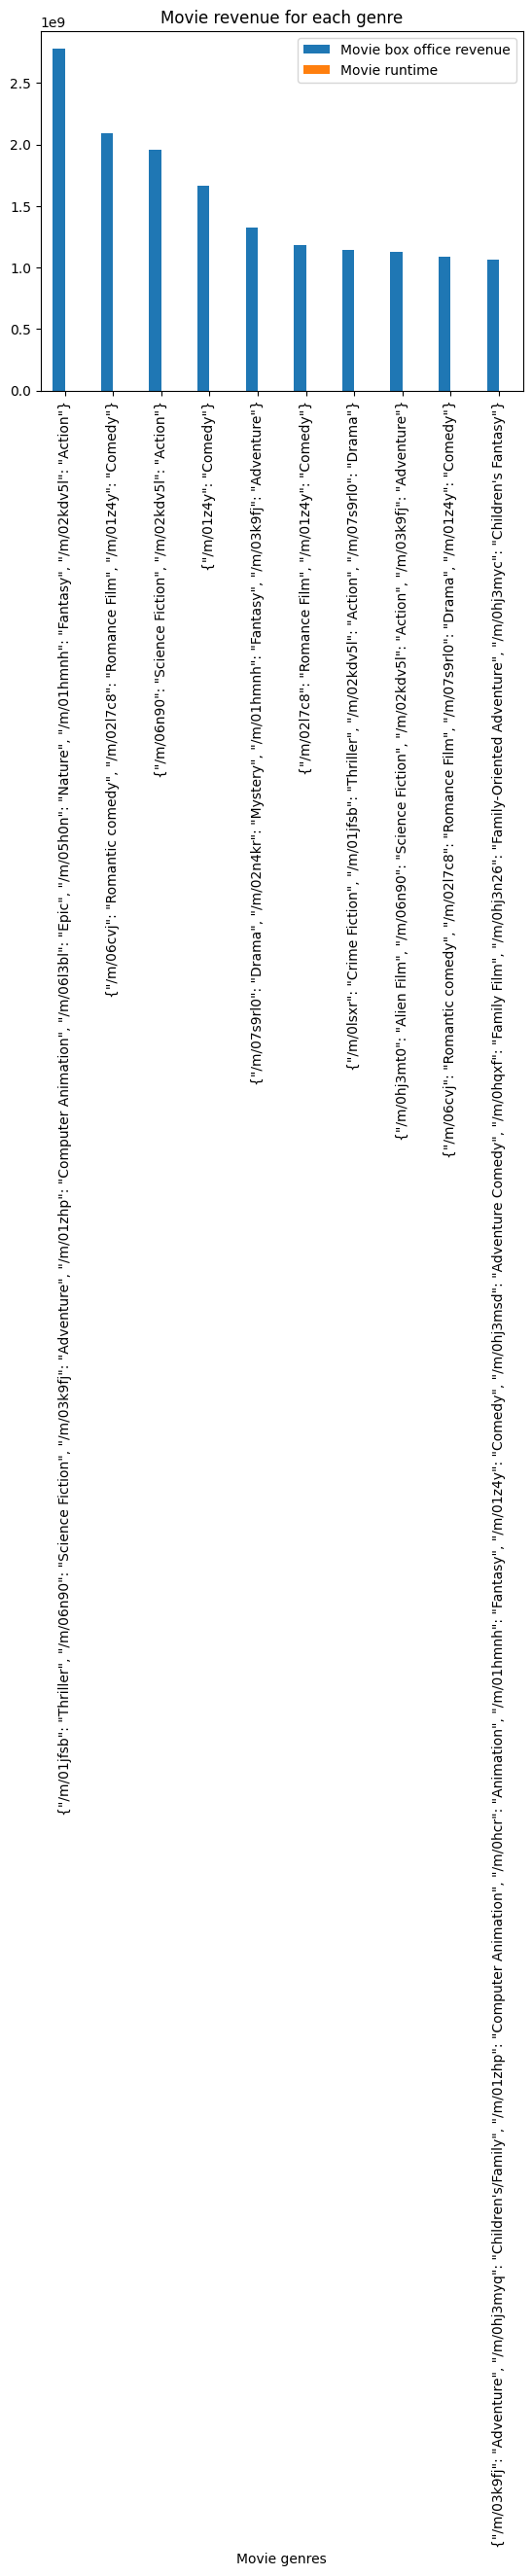

In [38]:
#display the movie revenue for each genre on box chart using only the top 10 genres
movie_metadata_clean.sort_values('Movie box office revenue', ascending = False).head(10).plot(kind='bar',title='Movie revenue for each genre')
plt.show()



In [19]:
#group movies by genre and box office revenue and display the top 10 genres with the highest box office revenue
movie_metadata_clean = movie_metadata_clean.groupby(['Movie genres']).sum() 
movie_metadata_clean.sort_values('Movie box office revenue', ascending = False).head(10)


,Movie box office revenue,Movie runtime
Movie genres,,
"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""Adventure"", ""/m/01zhp"": ""Computer Animation"", ""/m/06l3bl"": ""Epic"", ""/m/05h0n"": ""Nature"", ""/m/01hmnh"": ""Fantasy"", ""/m/02kdv5l"": ""Action""}",2.782275e+09,178.0
"{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""Romance Film"", ""/m/01z4y"": ""Comedy""}",2.091462e+09,3678.0
"{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action""}",1.958142e+09,591.0
"{""/m/01z4y"": ""Comedy""}",1.667774e+09,9486.0
"{""/m/07s9rl0"": ""Drama"", ""/m/02n4kr"": ""Mystery"", ""/m/01hmnh"": ""Fantasy"", ""/m/03k9fj"": ""Adventure""}",1.328111e+09,130.0
"{""/m/02l7c8"": ""Romance Film"", ""/m/01z4y"": ""Comedy""}",1.180234e+09,2616.0
"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Thriller"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}",1.142077e+09,790.0
"{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/03k9fj"": ""Adventure""}",1.123747e+09,247.0
"{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""Romance Film"", ""/m/07s9rl0"": ""Drama"", ""/m/01z4y"": ""Comedy""}",1.087216e+09,2087.0


In [35]:
#compare character_metadata_clean['wikipedia movie ID'] with plot_summaries['wikipedia movie ID'] and create a new dataframe with the columns we need
character_metadata_clean = character_metadata_clean[character_metadata_clean.index.isin(plot_summaries.index)]


42303

In [36]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
#use NLP to find the common words from plot summaries and character metadata 'Character name'
#first we need to clean the data
#remove punctuation
plot_summaries['Plot Summary'] = plot_summaries['Plot Summary'].str.replace('[^\w\s]','')
#remove numbers
plot_summaries['Plot Summary'] = plot_summaries['Plot Summary'].str.replace('\d+', '')
#remove stopwords
stop = stopwords.words('english')
plot_summaries['Plot Summary'] = plot_summaries['Plot Summary'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#remove common words
freq = pd.Series(' '.join(plot_summaries['Plot Summary']).split()).value_counts()[:10]
freq = list(freq.index)
plot_summaries['Plot Summary'] = plot_summaries['Plot Summary'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#remove rare words
freq = pd.Series(' '.join(plot_summaries['Plot Summary']).split()).value_counts()[-10:]
freq = list(freq.index)
plot_summaries['Plot Summary'] = plot_summaries['Plot Summary'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#remove words with length 1
plot_summaries['Plot Summary'] = plot_summaries['Plot Summary'].apply(lambda x: " ".join(x for x in x.split() if len(x)>1))
#stemming
st = PorterStemmer()
plot_summaries['Plot Summary'] = plot_summaries['Plot Summary'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
#tokenize
plot_summaries['Plot Summary'] = plot_summaries['Plot Summary'].apply(lambda x: word_tokenize(x))


/var/folders/4n/zzxjf3fs0fqbmxgbcht_g0cw0000gn/T/ipykernel_3090/668698732.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  plot_summaries['Plot Summary'] = plot_summaries['Plot Summary'].str.replace('[^\w\s]','')
/var/folders/4n/zzxjf3fs0fqbmxgbcht_g0cw0000gn/T/ipykernel_3090/668698732.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  plot_summaries['Plot Summary'] = plot_summaries['Plot Summary'].str.replace('\d+', '')


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/yasmineleuch/nltk_data'
    - '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/nltk_data'
    - '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/share/nltk_data'
    - '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [30]:
#use NLP in plot_summaries['Plot Summary'] to find character_metadata['Character name'] 
#first we need to clean the data
#remove punctuation



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yasmineleuch/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True